In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os


In [2]:
# Tentukan path ke dataset
dataset_dir = './dataset'

In [3]:
# Membaca dataset
categories = os.listdir(dataset_dir)  # List semua folder di dalam dataset
data_count = {}

# Menghitung jumlah gambar per kategori
for category in categories:
    category_path = os.path.join(dataset_dir, category)
    if os.path.isdir(category_path):  # Pastikan hanya membaca folder
        data_count[category] = len(os.listdir(category_path))

# Menampilkan hasil
print("Jumlah gambar per kategori:")
for category, count in data_count.items():
    print(f"- {category}: {count} gambar")

# Validasi jumlah total dataset
total_images = sum(data_count.values())
print(f"\nTotal jumlah gambar dalam dataset: {total_images}")

Jumlah gambar per kategori:
- cardboard: 403 gambar
- metal: 410 gambar
- paper: 594 gambar
- plastic: 482 gambar

Total jumlah gambar dalam dataset: 1889


In [4]:
# Membaca dataset dan membaginya menjadi training dan validation
# ImageDataGenerator digunakan untuk pemrosesan gambar
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load data training dan validation
train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 1513 images belonging to 4 classes.
Found 376 images belonging to 4 classes.


In [5]:
# Menambahkan augmentasi data dengan variasi lebih besar
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,  # Memperbesar rotasi hingga 50 derajat
    width_shift_range=0.3,  # Memperbesar pergeseran horizontal
    height_shift_range=0.3,  # Memperbesar pergeseran vertikal
    shear_range=0.3,  # Meningkatkan shear (kecondongan)
    zoom_range=0.3,  # Memperbesar zoom range
    horizontal_flip=True,  # Menambahkan flip horizontal
    fill_mode='nearest',  # Metode pengisian setelah transformasi
    validation_split=0.2  # Menentukan subset data untuk validasi
)

# Apply augmentasi pada data training
train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Apply augmentasi pada data validasi
validation_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 1513 images belonging to 4 classes.
Found 376 images belonging to 4 classes.


In [6]:
# Membuat model CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(4, activation='softmax')  # Output layer for 5 classes
])

# Menyusun model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


c:\Users\CAMBANG\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Melatih model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)


c:\Users\CAMBANG\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.2789 - loss: 1.6729 - val_accuracy: 0.4489 - val_loss: 1.2894
Epoch 2/30
 1/47 ━━━━━━━━━━━━━━━━━━━━ 33s 727ms/step - accuracy: 0.7500 - loss: 0.9827

c:\Users\CAMBANG\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 0.7500 - loss: 0.9827 - val_accuracy: 0.4432 - val_loss: 1.2467
Epoch 3/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 39s 831ms/step - accuracy: 0.5311 - loss: 1.1018 - val_accuracy: 0.4545 - val_loss: 1.2098
Epoch 4/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.5312 - loss: 1.1497 - val_accuracy: 0.4403 - val_loss: 1.1613
Epoch 5/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 40s 838ms/step - accuracy: 0.5591 - loss: 1.0329 - val_accuracy: 0.4858 - val_loss: 1.0690
Epoch 6/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.4688 - loss: 1.0911 - val_accuracy: 0.5199 - val_loss: 1.0708
Epoch 7/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 40s 841ms/step - accuracy: 0.6846 - loss: 0.8396 - val_accuracy: 0.4034 - val_loss: 1.2983
Epoch 8/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.3750 - loss: 1.3031 - val_accuracy: 0.4062 - val_loss: 1.2861
Epoch 9/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 39s 829ms/step - accuracy: 0.6061 - loss: 0.9456 - val_accuracy: 0.4716 - val_

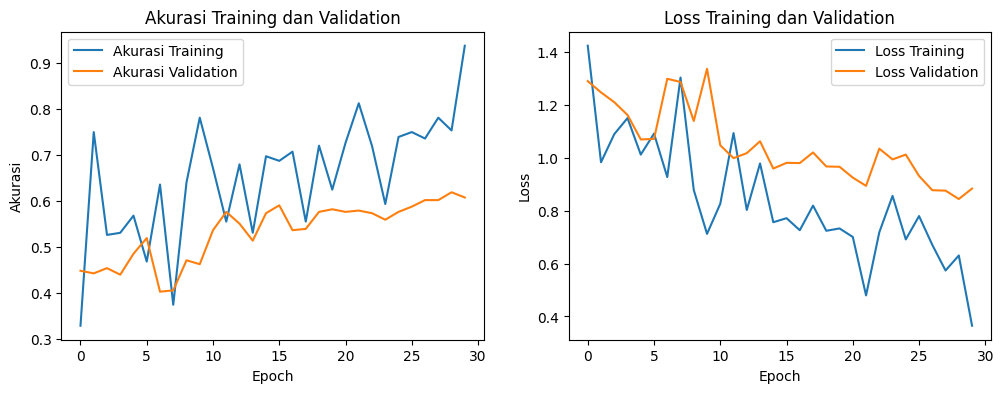

In [8]:
# Visualisasi hasil training
plt.figure(figsize=(12, 4))

# Grafik Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Akurasi Training')
plt.plot(history.history['val_accuracy'], label='Akurasi Validation')
plt.title('Akurasi Training dan Validation')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

# Grafik Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss Training')
plt.plot(history.history['val_loss'], label='Loss Validation')
plt.title('Loss Training dan Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [9]:
# Evaluasi model
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')


12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 365ms/step - accuracy: 0.6210 - loss: 0.8842
Validation Loss: 0.8828580379486084
Validation Accuracy: 0.6303191781044006


In [10]:
# Menyimpan model
model.save('sampah_classifier_model-index5.h5')